In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

data_dir = pathlib.Path("Plant_leave_diseases_dataset_with_augmentation")

image_count = len(list(data_dir.glob("*/*.jpg")))
image_count

61484

In [2]:
my_batch_size = 32
img_height = 180
img_width = 180

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=my_batch_size,
)

Found 61486 files belonging to 39 classes.
Using 49189 files for training.


In [4]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=my_batch_size
)

Found 61486 files belonging to 39 classes.
Using 12297 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Background_without_leaves', 'Blueberry___healthy', 'Cherry___Powdery_mildew', 'Cherry___healthy', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust', 'Corn___Northern_Leaf_Blight', 'Corn___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl

In [6]:
model_number = 79

model = tf.keras.models.load_model('zapisane_modele/model_%d_epok' % (model_number))

1/1 [==============================] - 0s 142ms/step
This image most likely belongs to Peach___Bacterial_spot with a 100.00 percent confidence.


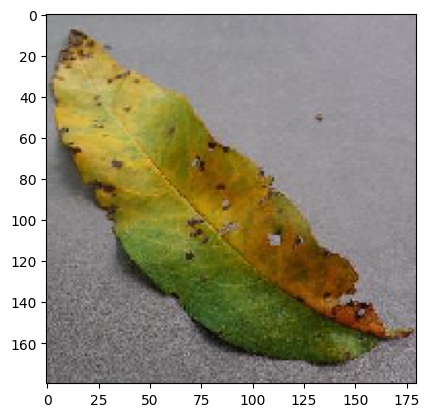

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

image_path = "D:\projekt\Plant_leave_diseases_dataset_with_augmentation\Peach___Bacterial_spot\image (21).JPG"

img_from_db = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
img_array = tf.keras.preprocessing.image.img_to_array(img_from_db)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score)))

plt.imshow(img_from_db)

1/1 [==============================] - 0s 15ms/step
This image most likely belongs to Pepper,_bell___healthy with a 99.91 percent confidence.


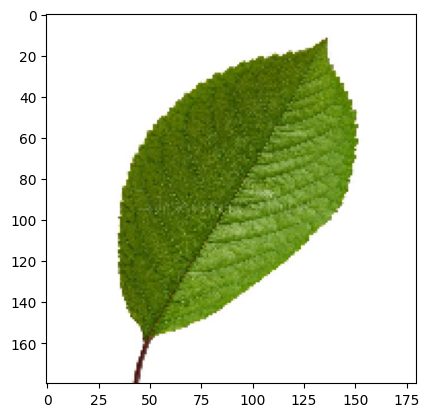

In [8]:
cherry_leaf_url = "https://thumbs.dreamstime.com/b/green-sweet-cherry-leaf-isolated-white-background-close-up-182823139.jpg"
cherry_leaf_path = tf.keras.utils.get_file("Cherry_leaf_healthy_3", origin=cherry_leaf_url)

img_cherry = tf.keras.utils.load_img(cherry_leaf_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img_cherry)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

plt.imshow(img_cherry)